Import libraries and define directories for data

In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

# variables for directories (windows)
TEST_DIR = "C:/Users/Dowi/PycharmProjects/cats_vs_dogs/data/test/test1"
TRAIN_DIR = "C:/Users/Dowi/PycharmProjects/cats_vs_dogs/data/train/train"

In [ ]:
IMG_SIZE = (128, 128)

# load images from dir
def load_images(folder):
	images = []
	filenames = []

	for filename in os.listdir(folder):

		if filename.endswith('.jpg'):
			img_path = os.path.join(folder, filename)

			img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)

			# normalize the data down to [0, 1], 255.0 = max RGB value
			img_array = tf.keras.utils.img_to_array(img) / 255.0
			images.append(img_array)
			filenames.append(filename)
	return (np.array(images), filenames)

train_images, train_filenames = load_images(TRAIN_DIR)

: 

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 148ms/step - accuracy: 0.6918 - loss: 0.5786
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 148ms/step - accuracy: 0.6918 - loss: 0.5786
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 166ms/step - accuracy: 0.7830 - loss: 0.4606
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 166ms/step - accuracy: 0.7830 - loss: 0.4606
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 159ms/step - accuracy: 0.8248 - loss: 0.3864
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 159ms/step - accuracy: 0.8248 - loss: 0.3864
Epoch 4/5
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 150ms/step - accuracy: 0.8717 - loss: 0.2970
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 150ms/step - accuracy: 0.8717 - loss: 0.2970
Epoch 5/5
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 156ms/step - accuracy: 0.9196 - loss: 0.1962
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 156ms/step - accuracy: 0.9196 - loss: 0.1962


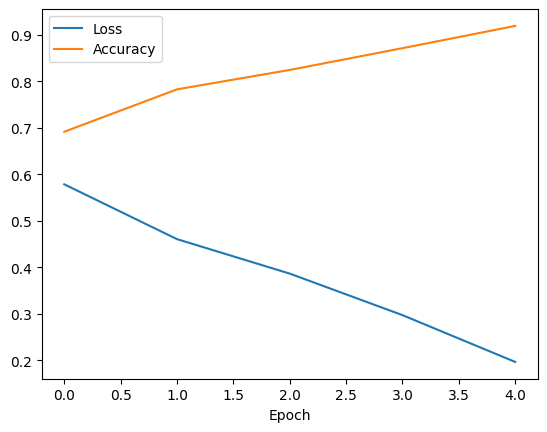

In [ ]:
# assign labels based on filename (assuming 'cat' or 'dog' in filename)
def get_label(filename):
	if 'cat' in filename.lower():
		return (0)
	elif 'dog' in filename.lower():
		return (1)
	else:
		return (-1)  # Unknown

# training labels determining model accuracy for backpropagation
train_labels = np.array([get_label(f) for f in train_filenames])

# convoluted neural network
model = tf.keras.Sequential([
	tf.keras.layers.Input(shape=(128, 128, 3)),
	tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
	tf.keras.layers.MaxPooling2D(2, 2),
	tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
	tf.keras.layers.MaxPooling2D(2, 2),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(64, activation='relu'),
	tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train model
history = model.fit(train_images, train_labels, epochs=5, batch_size=32)

# plot training loss and accuracy
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [3]:
# Load the trained model from the specified path
model_load_path = "data/models/cats_vs_dogs_model.keras"
loaded_model = tf.keras.models.load_model(model_load_path)

In [4]:
# pick one image to visualize
img = train_images[0]
img_batch = np.expand_dims(img, axis=0)

# Create a model that outputs the feature maps of the first Conv2D layer
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
activation_model = tf.keras.models.Model(inputs=model.layers[0].input, outputs=layer_outputs[0])

# Get the feature maps
feature_maps = activation_model.predict(img_batch)[0]

# Plot the first 32 feature maps
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
	ax.imshow(feature_maps[:, :, i], cmap='viridis')
	ax.axis('off')
plt.tight_layout()
plt.show()

NameError: name 'train_images' is not defined

In [ ]:
# Load test images
test_images, test_filenames = load_images(TEST_DIR)

# Predict using the trained model
preds = model.predict(test_images).flatten()
pred_labels = (preds > 0.5).astype(int)

# Get true labels from filenames
true_labels = np.array([get_label(f) for f in test_filenames])

# Display each image, prediction, and true label
for idx in range(len(test_images)):
	plt.imshow(test_images[idx])
	plt.axis('off')
	pred = 'Dog' if pred_labels[idx] == 1 else 'Cat'
	true = 'Dog' if true_labels[idx] == 1 else 'Cat'
	color = 'green' if pred_labels[idx] == true_labels[idx] else 'red'
	plt.title(f"Predicted: {pred}\nActual: {true}", color=color)
	plt.show()

In [ ]:
model_save_path = "data/models/cats_vs_dogs_model.keras"
model.save(model_save_path)

SystemExit: Model saved. Please restart the kernel to reset the code.

C:\Users\Dowi\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
